In [40]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [41]:
fh=download(url, "covid.csv")

"covid.csv"

In [42]:
using CSV 
using DataFrames 

In [43]:
data=CSV.read("covid.csv", DataFrame)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [44]:
all_countries=data[:, 2]

274-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [45]:
countries=["Colombia", "US", "China", "Mexico", "Spain", "Australia"]

6-element Array{String,1}:
 "Colombia"
 "US"
 "China"
 "Mexico"
 "Spain"
 "Australia"

In [46]:
num_days=length(data[1, :])-4

407

In [47]:
countriesvector=zeros(length(countries), num_days)

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [48]:
function createarraycountrieszeros()
count=0
count2=0


for country in countries
    count2=count2+1
    for scountry in all_countries
        count=count + 1
        if scountry==country
            println(scountry, count)
            println(count2)
            count3=1
            for cell in data[count, 5:end]
                countriesvector[count2, count3]=countriesvector[count2, count3] + cell
                count3=count3+1
            end
            
        end
    
    end
    count=0
end
end

createarraycountrieszeros()


Colombia92
1
US250
2
China59
3
China60
3
China61
3
China62
3
China63
3
China64
3
China65
3
China66
3
China67
3
China68
3
China69
3
China70
3
China71
3
China72
3
China73
3
China74
3
China75
3
China76
3
China77
3
China78
3
China79
3
China80
3
China81
3
China82
3
China83
3
China84
3
China85
3
China86
3
China87
3
China88
3
China89
3
China90
3
China91
3
Mexico182
4
Spain234
5
Australia9
6
Australia10
6
Australia11
6
Australia12
6
Australia13
6
Australia14
6
Australia15
6
Australia16
6


In [49]:
data[234, :]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64
234,missing,Spain,40.4637,-3.74922,0,0,0,0


Change zeros to NaN 

In [50]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in countriesvector[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
            countriesvector[countcountries, countcells]=NaN
        end
    end
    countcells=0
end


countriesvector


6×407 Array{Float64,2}:
 NaN    NaN    NaN     NaN     NaN    …       2.2596e6        2.26265e6
   1.0    1.0    2.0     2.0     5.0          2.86941e7       2.876e7
 548.0  643.0  920.0  1406.0  2075.0     101013.0        101037.0
 NaN    NaN    NaN     NaN     NaN            2.09719e6       2.10499e6
 NaN    NaN    NaN     NaN     NaN            3.13018e6       3.13632e6
 NaN    NaN    NaN     NaN       4.0  …   28996.0         29007.0

In [51]:
using Plots
p=plot();

In [52]:
col_names=names(data)

411-element Array{String,1}:
 "Province/State"
 "Country/Region"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "2/20/21"
 "2/21/21"
 "2/22/21"
 "2/23/21"
 "2/24/21"
 "2/25/21"
 "2/26/21"
 "2/27/21"
 "2/28/21"
 "3/1/21"
 "3/2/21"
 "3/3/21"

In [53]:
dates=string.(col_names)[5:end] #convert to strings (point for applaying to all elements )

407-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "2/20/21"
 "2/21/21"
 "2/22/21"
 "2/23/21"
 "2/24/21"
 "2/25/21"
 "2/26/21"
 "2/27/21"
 "2/28/21"
 "3/1/21"
 "3/2/21"
 "3/3/21"

In [54]:
using Dates 

In [55]:
format=Dates.DateFormat("m/d/y")

dateformat"m/d/y"

In [56]:
parse.(Date, dates, format) + Year(2000)

407-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2021-02-20
 2021-02-21
 2021-02-22
 2021-02-23
 2021-02-24
 2021-02-25
 2021-02-26
 2021-02-27
 2021-02-28
 2021-03-01
 2021-03-02
 2021-03-03

In [57]:
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft)
    count=count+1
end


    

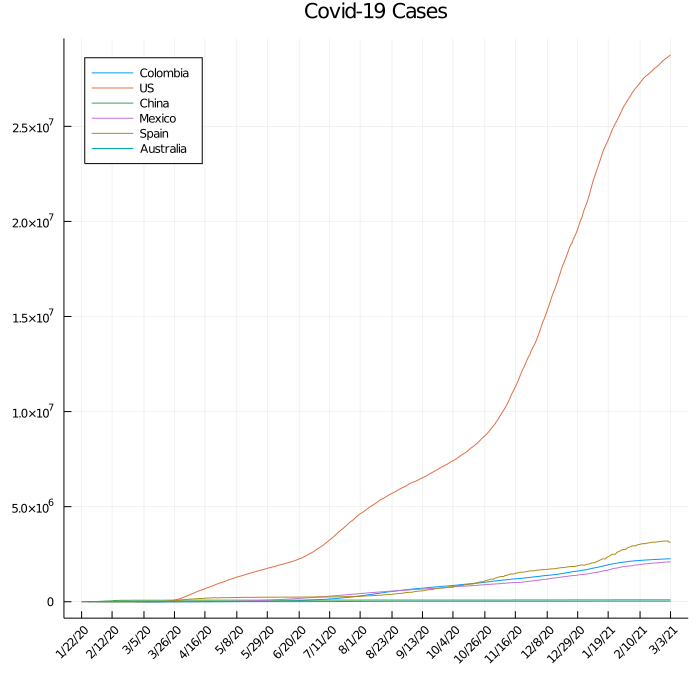

In [58]:
title!("Covid-19 Cases")
p

## Log10 Scale

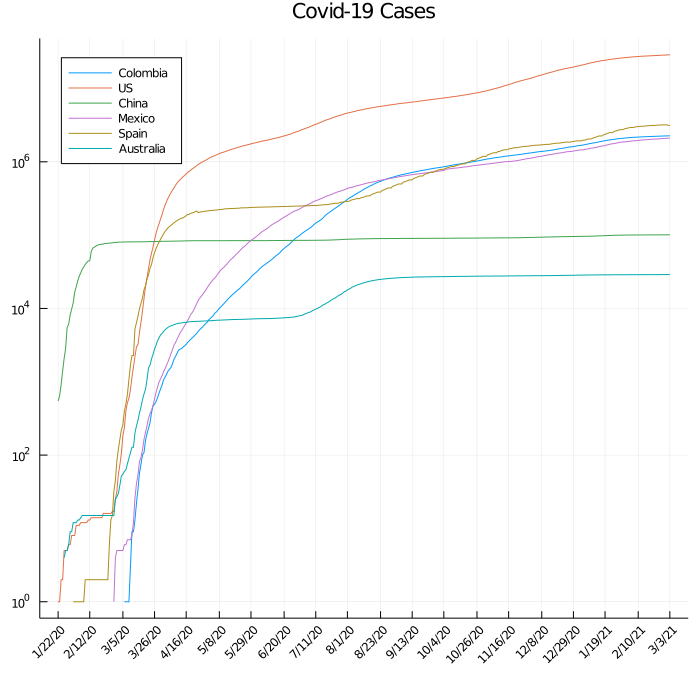

In [59]:
p=plot();
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
    count=count+1
end
title!("Covid-19 Cases")
p

In [60]:
using Interact

In [61]:
using WebIO


Press F5 if visualizations don´t work

In [62]:
num_days=length(dates)


@manipulate for day in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:day]
        plot!(xlim=(0, num_days), dates[1:day],  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
        a=a+1
    end
    title!("Covid-19 Cases")
    p

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 407,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
204, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000013944010, Task (runnable) @0x0000000013944010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\

In [63]:
countriesvector

6×407 Array{Float64,2}:
 NaN    NaN    NaN     NaN     NaN    …       2.2596e6        2.26265e6
   1.0    1.0    2.0     2.0     5.0          2.86941e7       2.876e7
 548.0  643.0  920.0  1406.0  2075.0     101013.0        101037.0
 NaN    NaN    NaN     NaN     NaN            2.09719e6       2.10499e6
 NaN    NaN    NaN     NaN     NaN            3.13018e6       3.13632e6
 NaN    NaN    NaN     NaN       4.0  …   28996.0         29007.0

In [64]:
weeklynewcases=zeros(length(countries), num_days)

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [65]:
countcountry=0
countday=0
for country in countries
    countcountry=countcountry +1
    for data in countriesvector[countcountry, 1:end]
        countday=countday+1
        condition=countday%7
        if condition==0 && countday !=0
            newcell=data - countriesvector[countcountry, countday-6]
            weeklynewcases[countcountry, countday]=newcell
        end
    end
    countday=0
end

weeklynewcases

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …  0.0  0.0  0.0  0.0   22057.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     4.0     0.0  0.0  0.0  0.0  384986.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  4961.0     0.0  0.0  0.0  0.0     181.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN       0.0  0.0  0.0  0.0   36286.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN       0.0  0.0  0.0  0.0  -40460.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …  0.0  0.0  0.0  0.0      49.0  0.0

In [66]:
countcountry=0
for country in countries
    countcountry=countcountry + 1
    weeklynewcases[countcountry, 7]=weeklynewcases[countcountry, 7] + countriesvector[countcountry, 1]
end


In [67]:
weeklynewcases

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …  0.0  0.0  0.0  0.0   22057.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     5.0     0.0  0.0  0.0  0.0  384986.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  5509.0     0.0  0.0  0.0  0.0     181.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN       0.0  0.0  0.0  0.0   36286.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN       0.0  0.0  0.0  0.0  -40460.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …  0.0  0.0  0.0  0.0      49.0  0.0

In [68]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in weeklynewcases[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
            weeklynewcases[countcountries, countcells]=NaN
        end
    end
    countcells=0
end


weeklynewcases

6×407 Array{Float64,2}:
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …  NaN  NaN  NaN  NaN   22057.0  NaN
 NaN  NaN  NaN  NaN  NaN  NaN     5.0     NaN  NaN  NaN  NaN  384986.0  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  5509.0     NaN  NaN  NaN  NaN     181.0  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN       NaN  NaN  NaN  NaN   36286.0  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN       NaN  NaN  NaN  NaN  -40460.0  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …  NaN  NaN  NaN  NaN      49.0  NaN

In [69]:
weeklynewcases[2, 203]

314037.0

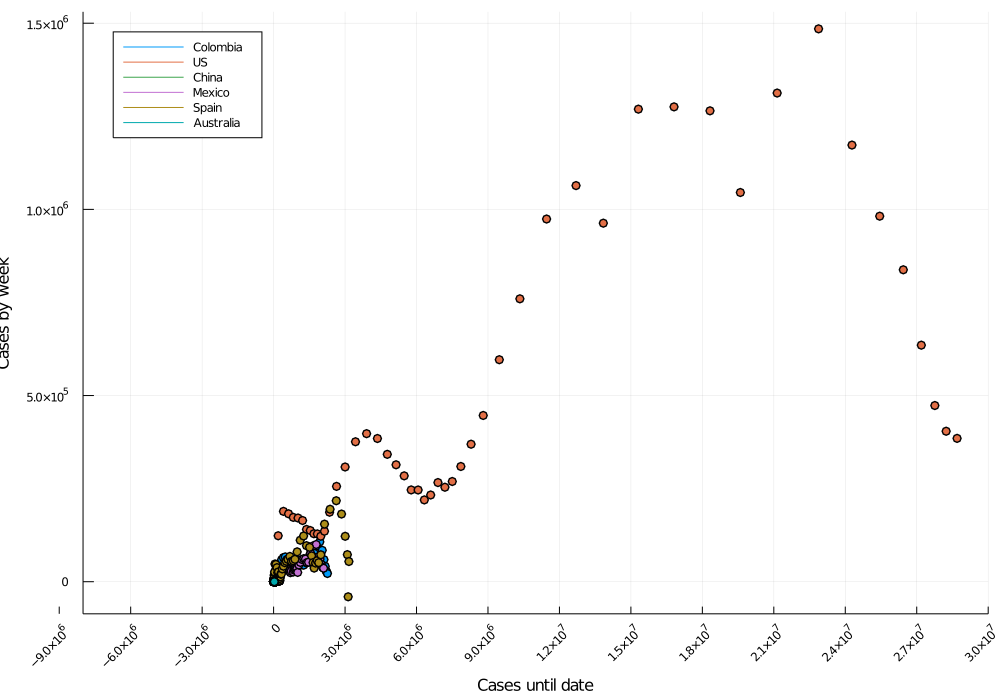

In [70]:
num_days=length(dates)
count=0
    p=plot();
    for country in countries
        count=count+1
        mycountrydata=countriesvector[count, 1:end]
        plot!(mycountrydata,  weeklynewcases[count, 1:end]  , xticks=20, xrotation=45, size=[1000,700],label=country, leg=:topleft, m=:o)
     end

p
xlabel!("Cases until date")
ylabel!("Cases by week")

In [71]:
num_days=length(dates)

@manipulate for day in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:day]
        plot!(mycountrydata,  weeklynewcases[a, 1:day]  , xticks=20, xrotation=45, size=[1000, 700],label= country, leg=:topleft, m=:o)
       
        a=a+1
        
    end
    p
    xlabel!("Cases until date")
    ylabel!("Cases by week")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 407,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
204, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000012a15430, Task (runnable) @0x0000000012a15430), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\

In [72]:
weeklynewcasescontinuous=zeros(length(countries), num_days)

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [73]:
countcountry=0
countday=0
for country in countries
    countcountry=countcountry +1
    for data in countriesvector[countcountry, 1:end]
        countday=countday+1
       
        if  countday >= 7
            newcell=data - countriesvector[countcountry, countday-6]
            weeklynewcasescontinuous[countcountry, countday]=newcell
        end
    end
    countday=0
end

weeklynewcasescontinuous

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …   21671.0   22057.0   21421.0
 0.0  0.0  0.0  0.0  0.0  0.0     4.0     402657.0  384986.0  373488.0
 0.0  0.0  0.0  0.0  0.0  0.0  4961.0        183.0     181.0     186.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        37015.0   36286.0   35617.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        43099.0  -40460.0  -43891.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …      47.0      49.0      50.0

In [74]:
countcountry=0
for country in countries
    countcountry=countcountry + 1
    weeklynewcasescontinuous[countcountry, 7]=weeklynewcasescontinuous[countcountry, 7] + countriesvector[countcountry, 1]
end
weeklynewcasescontinuous

6×407 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …   21671.0   22057.0   21421.0
 0.0  0.0  0.0  0.0  0.0  0.0     5.0     402657.0  384986.0  373488.0
 0.0  0.0  0.0  0.0  0.0  0.0  5509.0        183.0     181.0     186.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        37015.0   36286.0   35617.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        43099.0  -40460.0  -43891.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …      47.0      49.0      50.0

In [75]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in  weeklynewcasescontinuous[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
             weeklynewcasescontinuous[countcountries, countcells]=NaN
        end
    end
    countcells=0
end

weeklynewcasescontinuous

6×407 Array{Float64,2}:
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …   21671.0   22057.0   21421.0
 NaN  NaN  NaN  NaN  NaN  NaN     5.0     402657.0  384986.0  373488.0
 NaN  NaN  NaN  NaN  NaN  NaN  5509.0        183.0     181.0     186.0
 NaN  NaN  NaN  NaN  NaN  NaN   NaN        37015.0   36286.0   35617.0
 NaN  NaN  NaN  NaN  NaN  NaN   NaN        43099.0  -40460.0  -43891.0
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …      47.0      49.0      50.0

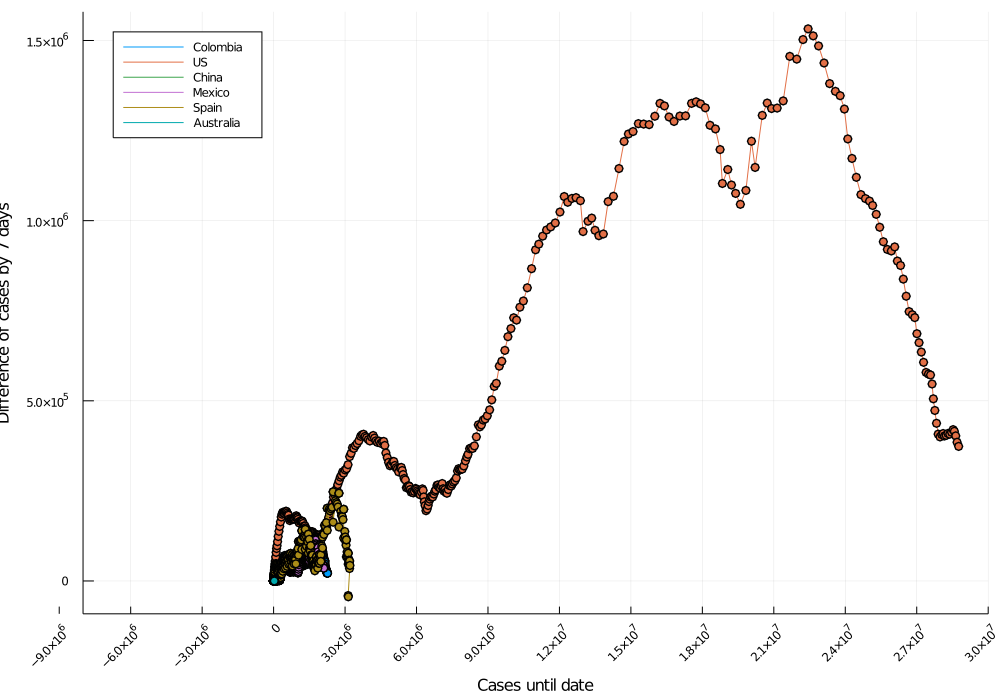

In [82]:
num_days=length(dates)
count=0
    p=plot();
    for country in countries
        count=count+1
        mycountrydata=countriesvector[count, 1:end]
        plot!(mycountrydata,  weeklynewcasescontinuous[count, 1:end]  , xticks=20, xrotation=45, size=[1000,700],label=country, leg=:topleft, m=:o)
     end

p
xlabel!("Cases until date")
ylabel!("Difference of cases by 7 days")

In [83]:
num_days=length(dates)

@manipulate for day in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:day]
        plot!(mycountrydata,  weeklynewcasescontinuous[a, 1:day]  , xticks=20, xrotation=45, size=[1000, 700],label= country, leg=:topleft, m=:o)
       
        a=a+1
        
    end
    p
    xlabel!("Cases until date")
    ylabel!("Difference of cases by 7 days")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 407,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
204, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000012611710, Task (runnable) @0x0000000012611710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\